In [1]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta

import tools
import importlib
importlib.reload(tools)

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

### Download data from AWS S3

In [2]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.download_data_from_s3(s3_bucket, local_path)

In [3]:
num_of_years = 10
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years) + 10)
end = dt.date.today()

In [4]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
# df = pd.read_csv('../data/hk_stock_full.csv', header=None)
df = pd.read_csv('../data/clean_hk_stock.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [5]:
df

,stock
0,0001.HK
1,0002.HK
2,0003.HK
3,0004.HK
4,0005.HK
5,0006.HK
6,0007.HK
7,0008.HK
8,0010.HK
9,0011.HK


In [6]:
def stock_begin_timegap(stock):
    num_of_years = 10
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [7]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0198.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
df

,stock,gap,coeff_var
0,0001.HK,0.0,0.183452
1,0002.HK,0.0,0.123809
2,0003.HK,0.0,0.199358
3,0004.HK,0.0,0.216156
4,0005.HK,0.0,0.198647
5,0006.HK,0.0,0.153624
6,0007.HK,0.0,0.435477
7,0008.HK,0.0,0.176571
8,0010.HK,0.0,0.328484
9,0011.HK,0.0,0.204832


In [9]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [10]:
stock_df.count()

stock        711
gap          711
coeff_var    711
dtype: int64

In [11]:
stock_df.describe()

,gap,coeff_var
count,711.000000,711.000000
mean,0.059072,0.445988
std,0.571037,0.276882
min,-1.000000,0.114076
25%,0.000000,0.267518
50%,0.000000,0.379890
75%,0.000000,0.545917
max,5.000000,3.128643


In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 1245
Data columns (total 3 columns):
stock        711 non-null object
gap          711 non-null float64
coeff_var    711 non-null float64
dtypes: float64(2), object(1)
memory usage: 22.2+ KB


In [13]:
### stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [14]:
stock_df.to_csv('../data/10yr_stock_qualified.csv')

### Get all dataset

In [15]:
stock_df = pd.read_csv('../data/10yr_stock_qualified.csv', index_col=0)

In [16]:
print('{} {}'.format(start, end))

2010-12-19 2020-12-28


In [17]:
print('{} {}'.format(start, end))

2010-12-19 2020-12-28


In [18]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  711 of 711 completed
CPU times: user 1min 9s, sys: 8.99 s, total: 1min 18s
Wall time: 1min 17s


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2572 entries, 2010-12-20 to 2020-12-24
Columns: 711 entries, 0001.HK to 6823.HK
dtypes: float64(711)
memory usage: 14.0 MB


In [20]:
dataset.to_csv('../data/10yr_stock_close.csv')

In [21]:
dataset.head(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0010.HK,0011.HK,...,3900.HK,3918.HK,3933.HK,3968.HK,3988.HK,3989.HK,3993.HK,3998.HK,3999.HK,6823.HK
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-20,54.286839,42.431778,5.907772,7.542655,49.314957,27.060410,0.72,1.804415,39.962875,83.726082,...,6.303220,0.962784,14.170225,13.326095,2.287869,0.41289,1.056937,2.111633,1.371677,0.241470
2010-12-21,55.382057,42.630985,5.939397,7.806098,49.875046,27.308163,0.74,1.792994,40.630898,84.501320,...,6.434081,0.962784,14.100760,13.574664,2.321680,0.40643,1.056937,2.051681,1.371677,0.240731
2010-12-22,57.334511,42.298962,5.907772,7.840768,49.906128,27.225569,0.76,1.821545,40.827366,84.888939,...,6.354111,0.956651,13.910029,13.629915,2.304775,0.42579,1.060098,2.198230,1.344243,0.245157


### Use close on all stocks to compile result

In [53]:
dataset = pd.read_csv('../data/10yr_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

In [54]:
dataset.tail(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0010.HK,0011.HK,...,3900.HK,3918.HK,3933.HK,3968.HK,3988.HK,3989.HK,3993.HK,3998.HK,3999.HK,6823.HK
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-22,52.549999,70.599998,11.34,20.150000,39.450001,40.150002,0.103,4.67,18.900000,131.699997,...,11.38,9.17,5.76,46.599998,2.57,0.118,4.10,3.46,0.83,10.08
2020-12-23,53.150002,71.150002,11.36,20.200001,39.549999,40.450001,0.102,4.69,18.940001,131.600006,...,11.04,9.40,5.66,46.900002,2.54,0.119,4.18,3.58,0.83,10.12
2020-12-24,53.650002,71.099998,11.36,20.450001,40.099998,40.750000,0.097,4.69,19.000000,132.399994,...,11.20,9.63,5.40,47.650002,2.59,0.118,4.18,3.52,0.82,10.12


### Remove Null in Dataset

In [55]:
null_count = list()
for i in dataset.index:
    null_dict = {
        'index' : i,
        'count' : dataset.loc[i].isna().sum()
    }
    null_count.append(null_dict)

In [56]:
null_df = pd.DataFrame(null_count)
null_df['index'] = pd.to_datetime(null_df['index'])
null_df.set_index('index', inplace=True)
null_df.head(20)

,count
index,
2010-12-20,9
2010-12-21,8
2010-12-22,7
2010-12-23,7
2010-12-27,709
2010-12-28,8
2010-12-29,12
2010-12-30,28
2010-12-31,705


In [57]:
null_df.describe()

,count
count,2572.000000
mean,33.106532
std,140.587829
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,711.000000


In [58]:
null_df['count'].quantile(0.8)

0.0

In [59]:
null_df['count'].quantile(0.9)

32.0

In [60]:
null_df['count'].quantile(0.95)

66.0

In [61]:
null_df[null_df['count']<=700].max()

count    83
dtype: int64

In [62]:
null_df[(null_df['count']>83) & (null_df['count']<700)]

,count
index,


In [63]:
non_trading_index = null_df[null_df['count']>700].index

In [64]:
non_trading_index

DatetimeIndex(['2010-12-27', '2010-12-31', '2011-02-02', '2011-09-29',
               '2011-12-27', '2012-01-23', '2012-01-24', '2012-01-25',
               '2012-03-19', '2012-04-04',
               ...
               '2019-12-26', '2020-01-27', '2020-01-28', '2020-04-13',
               '2020-04-30', '2020-05-01', '2020-06-25', '2020-10-01',
               '2020-10-02', '2020-10-13'],
              dtype='datetime64[ns]', name='index', length=107, freq=None)

In [65]:
dataset.drop(non_trading_index, inplace=True)

In [66]:
dataset.fillna(method='ffill', inplace=True)

In [68]:
null_count = list()
for i in dataset.index:
    null_dict = {
        'index' : i,
        'count' : dataset.loc[i].isna().sum()
    }
    null_count.append(null_dict)
null_df = pd.DataFrame(null_count)
null_df['index'] = pd.to_datetime(null_df['index'])
null_df.set_index('index', inplace=True)
null_df.describe()

,count
count,2465.000000
mean,0.017444
std,0.339649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


In [70]:
null_df[null_df['count']>0].count()

count    7
dtype: int64

In [71]:
null_df[null_df['count']>0]

,count
index,
2010-12-20,9
2010-12-21,8
2010-12-22,7
2010-12-23,5
2010-12-28,5
2010-12-29,5
2010-12-30,4


In [72]:
dataset.dropna(axis=0, how='any', inplace=True)

In [73]:
dataset.to_csv('../data/clean_10yr_stock_close.csv')

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today (Train and Test)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2575 entries, 2010-12-15 to 2020-12-24
Columns: 707 entries, 0001.HK to 6823.HK
dtypes: float64(707)
memory usage: 14.0 MB


In [35]:
train_start = '2011-01-01'
train_end = '2011-12-31'
dataset = dataset[train_start:train_end]

In [36]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [37]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [38]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [39]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [40]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 1.02 s, sys: 0 ns, total: 1.02 s
Wall time: 1.02 s


In [41]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [42]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(499849,)

In [43]:
sorted_corr.head(10)

0252.HK  0252.HK.prev    0.999820
0096.HK  0252.HK.prev    0.865528
0265.HK  0252.HK.prev    0.864138
0252.HK  0158.HK.prev    0.786192
         0413.HK.prev    0.733655
0859.HK  0252.HK.prev    0.733577
0877.HK  0252.HK.prev    0.731352
0529.HK  0252.HK.prev    0.729393
2309.HK  0252.HK.prev    0.719623
0252.HK  0837.HK.prev    0.717876
dtype: float64

### Analyze the top pair

In [46]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2011-01-03 to 2011-12-30
Columns: 1414 entries, 0001.HK.prev to 6823.HK
dtypes: float64(1414)
memory usage: 2.7 MB


In [44]:
for i, r in sorted_corr.head(10).items():
    prev = i[1]
    today = i[0]
    print('{} {} {:.2f}'.format(prev, today, comb_df[prev].corr(comb_df[today])))

0252.HK.prev 0252.HK -1.00
0252.HK.prev 0096.HK 0.87
0252.HK.prev 0265.HK 0.86
0158.HK.prev 0252.HK 0.79
0413.HK.prev 0252.HK 0.73
0252.HK.prev 0859.HK -0.73
0252.HK.prev 0877.HK 0.73
0252.HK.prev 0529.HK -0.73
0252.HK.prev 2309.HK -0.72
0837.HK.prev 0252.HK -0.72


0.8655280021393076
0252.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 3
Total prev stock rise and today rise 1


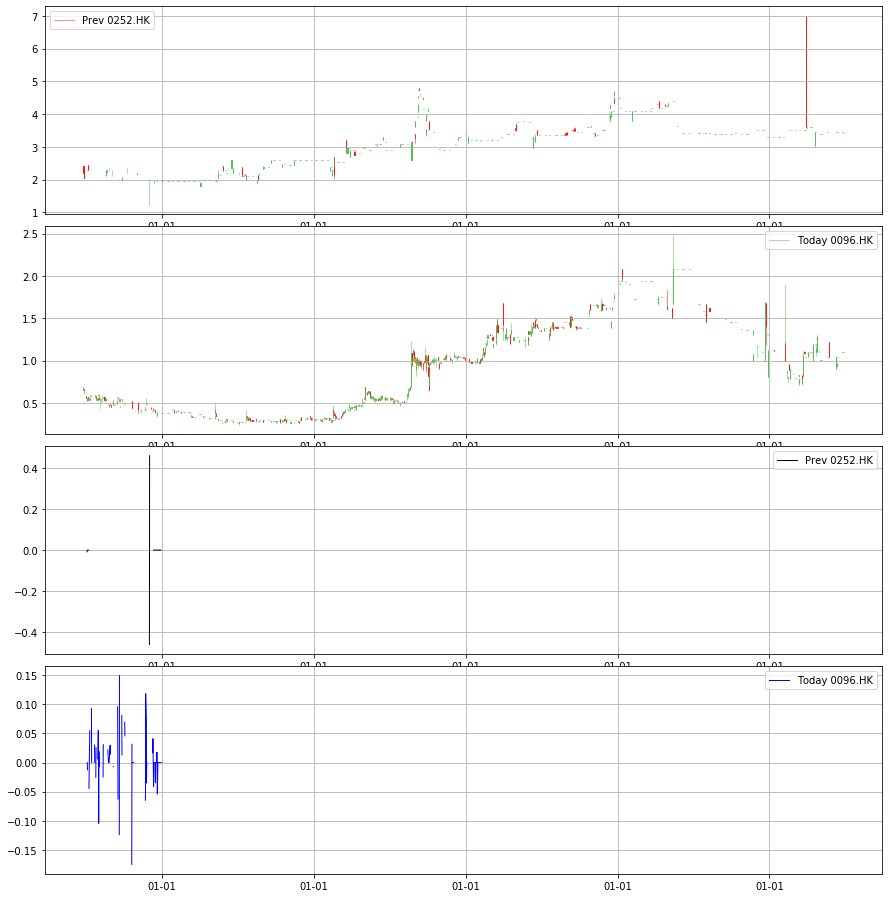

In [45]:
stock1 = '0252.HK.prev'
stock2 = '0096.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
tools.plot_two_stocks(stock1, stock2, prevday_returns, today_returns, start)

### Grapth the top correlation pair

In [ ]:
stock1 = '6898.HK.prev'
stock2 = '8612.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2, prevday_returns[stock1], today_returns[stock2])

### Upload to AWS S3

In [74]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.upload_data_to_s3(s3_bucket, local_path)